In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import files
# https://www.kaggle.com/datasets/svaningelgem/crypto-currencies-daily-prices
btc = pd.read_csv('/Users/yulun/Desktop/Cryptocurrencies/btc.csv')
eth = pd.read_csv('/Users/yulun/Desktop/Cryptocurrencies/eth.csv')
bnb = pd.read_csv('/Users/yulun/Desktop/Cryptocurrencies/bnb.csv')
doge = pd.read_csv('/Users/yulun/Desktop/Cryptocurrencies/doge.csv')
usdc = pd.read_csv('/Users/yulun/Desktop/Cryptocurrencies/usdc.csv')

In [3]:
btc.dtypes

ticker     object
date       object
open      float64
high      float64
low       float64
close     float64
dtype: object

In [4]:
# Change all date to datetime format
btc['date'] = pd.to_datetime(btc['date'])
eth['date'] = pd.to_datetime(eth['date'])
bnb['date'] = pd.to_datetime(bnb['date'])
doge['date'] = pd.to_datetime(doge['date'])
usdc['date'] = pd.to_datetime(usdc['date'])

In [5]:
# Merge all into one df for easier 
combined_df = [btc, eth, bnb, doge, usdc]
df = pd.concat(combined_df, ignore_index=True)
df

,ticker,date,open,high,low,close
0,BTC,2010-07-17,0.04951,0.04951,0.04951,0.04951
1,BTC,2010-07-18,0.04951,0.08585,0.04951,0.08584
2,BTC,2010-07-19,0.08584,0.09307,0.07723,0.08080
3,BTC,2010-07-20,0.08080,0.08181,0.07426,0.07474
4,BTC,2010-07-21,0.07474,0.07921,0.06634,0.07921
...,...,...,...,...,...,...
16015,USDC,2024-08-12,0.99990,1.00047,0.99967,0.99981
16016,USDC,2024-08-13,0.99991,1.00001,0.99961,0.99992
16017,USDC,2024-08-14,0.99992,1.00010,0.99951,0.99998
16018,USDC,2024-08-15,0.99999,1.00040,0.99970,0.99988


### Data Visualization

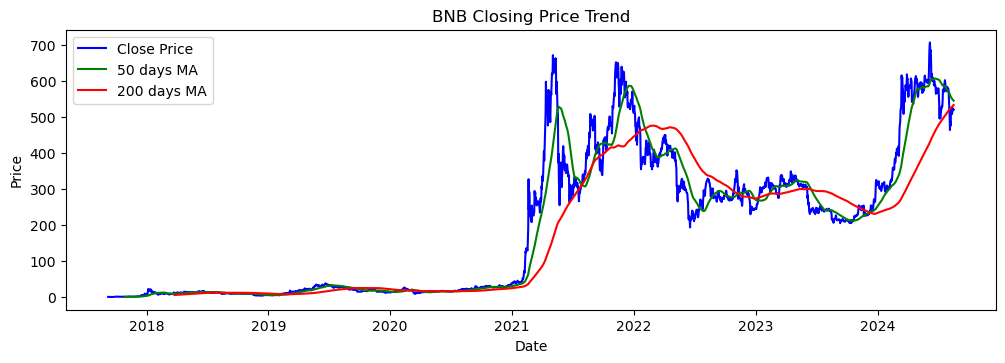

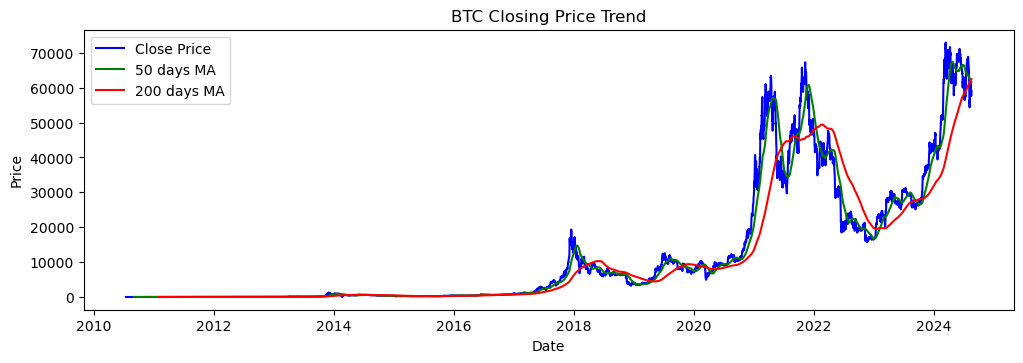

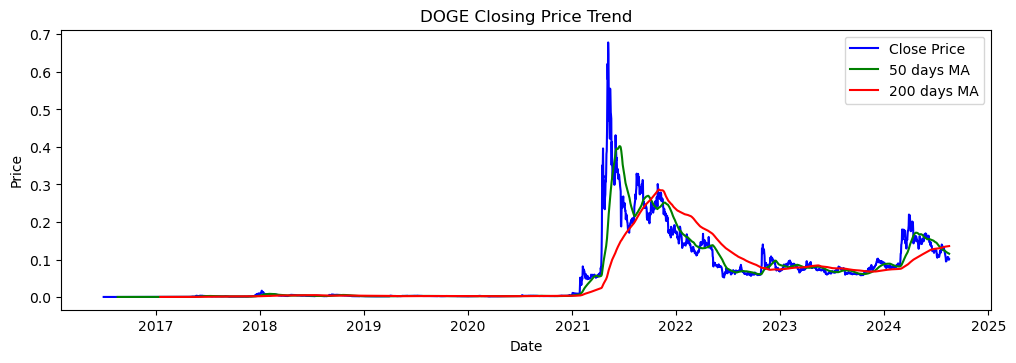

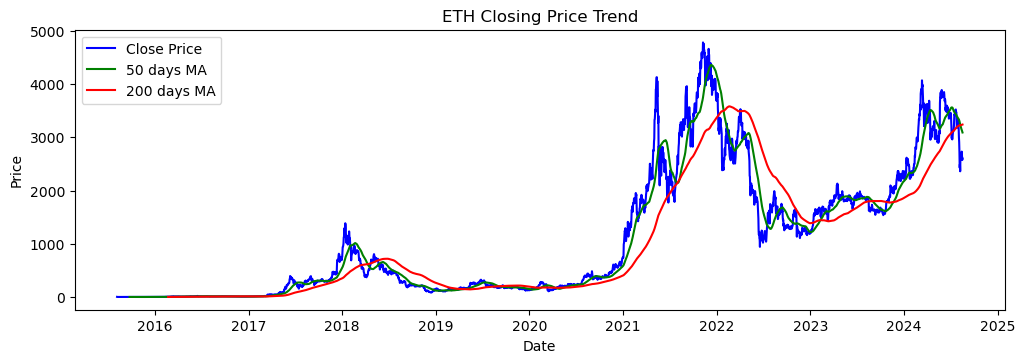

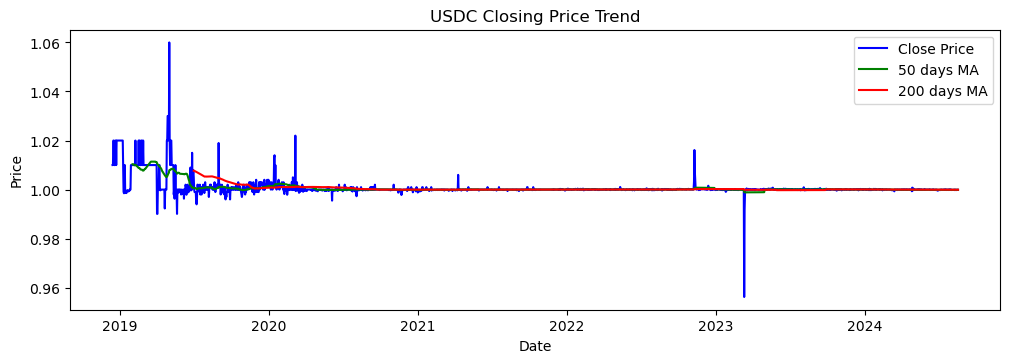

In [6]:
# Plot timetrend to see price action for each coin
results = {}

# Group data by ticker
grouped = df.groupby('ticker')

for ticker, group in grouped:
    results[ticker] = group

    # Set time as index
    group.set_index('date', inplace=True)

    # Calculate the 50 and 200 days moving average
    group['MA50'] = group['close'].rolling(window=50).mean()
    group['MA200'] = group['close'].rolling(window=200).mean()

    # Plot price action
    plt.figure(figsize=(12, 8))

    plt.subplot(2,1,1)
    plt.plot(group.index, group['close'], label='Close Price', color='blue')
    plt.plot(group.index, group['MA50'], label='50 days MA', color='green')
    plt.plot(group.index, group['MA200'], label='200 days MA', color='red')
    plt.title(f'{ticker} Closing Price Trend')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()

### Volatility Analysis

ticker
BNB     0.057953
BTC     0.072139
DOGE    0.088249
ETH     0.057595
USDC    0.002644
Name: return, dtype: float64


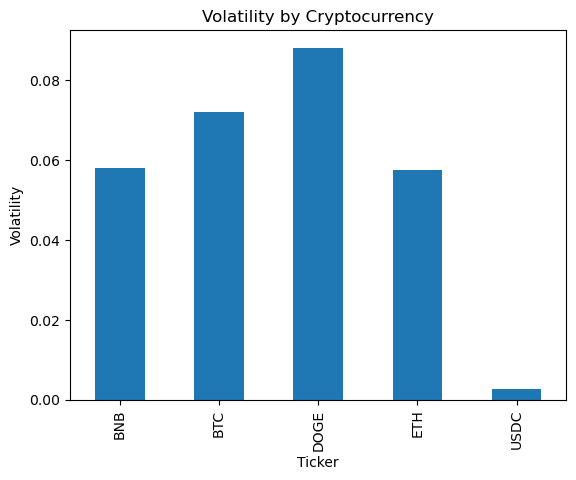

In [7]:
# Calculate daily returns
df['return'] = df.groupby('ticker')['close'].pct_change()

# Calculate volatility (standard deviation of returns) for each cryptocurrency
volatility = df.groupby('ticker')['return'].std()

print(volatility)

# Plot volatility
volatility.plot(kind='bar', title='Volatility by Cryptocurrency')
plt.xlabel('Ticker')
plt.ylabel('Volatility')
plt.show()


Based on the analysis, among the 5 cryptocurrencies, DOGE has the highest volatility among all, followed by BTC, BNB and ETH. USDC as a stablecoin has the least volatility

### Return Analysis

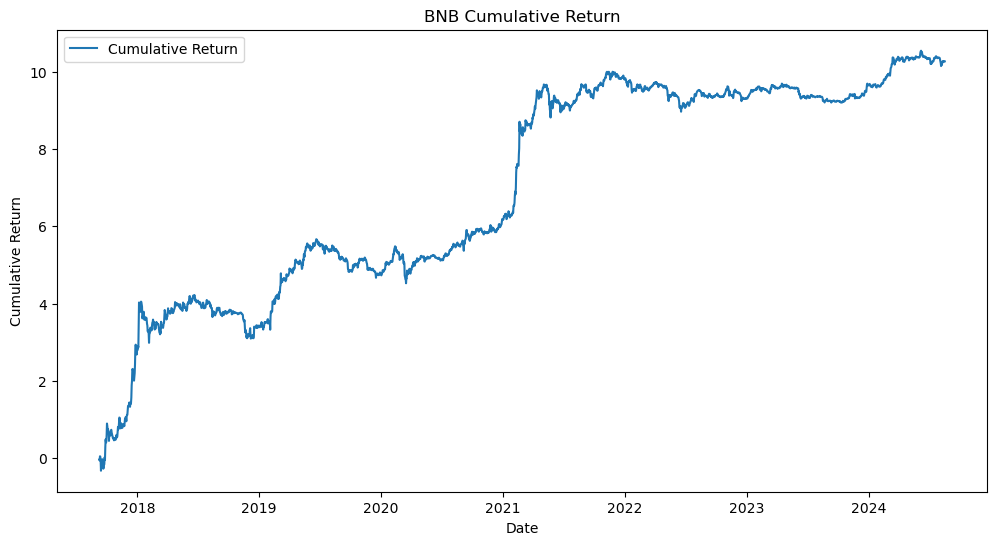

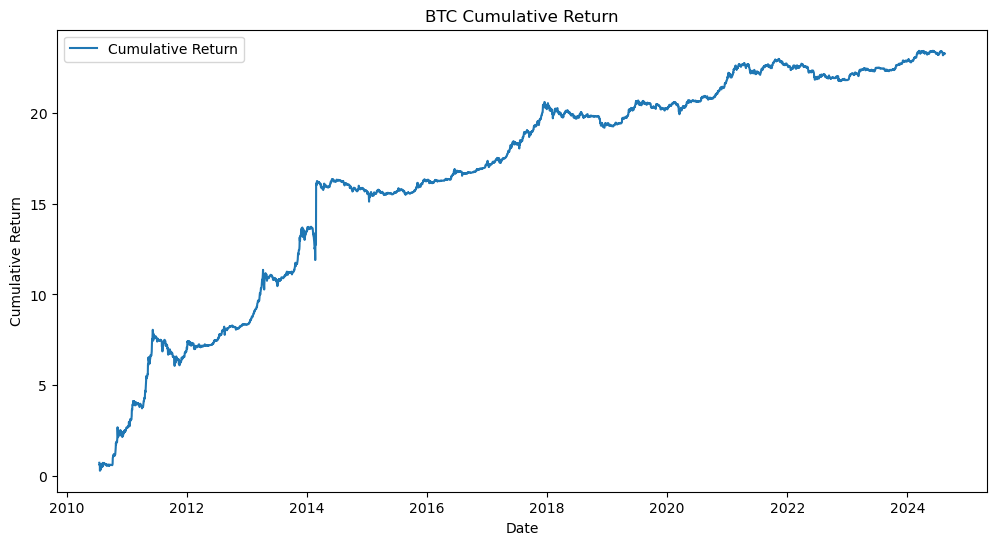

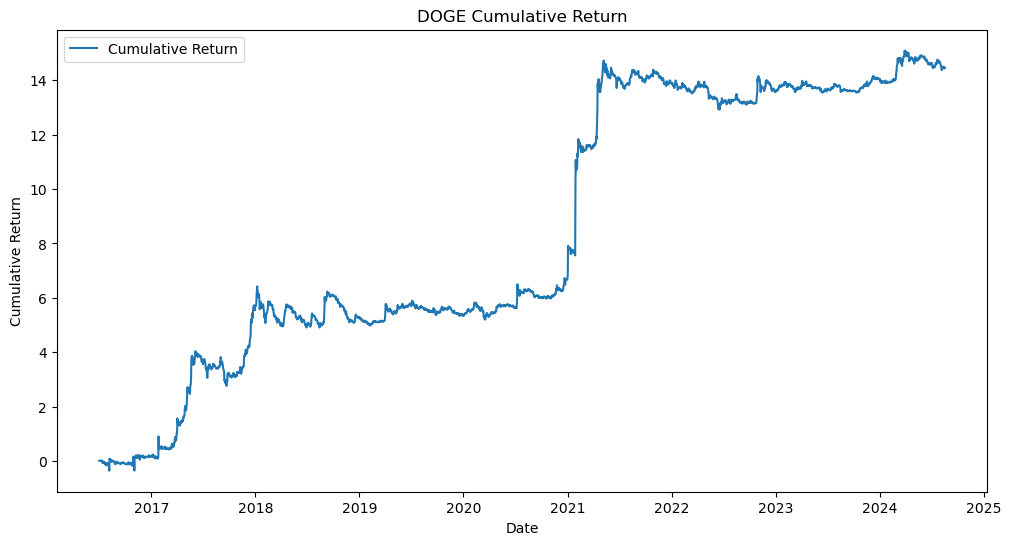

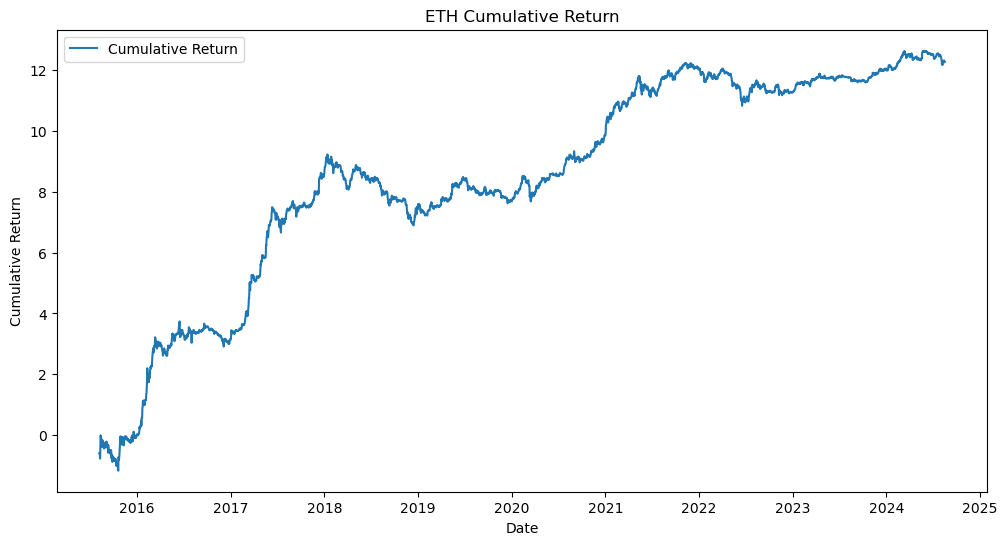

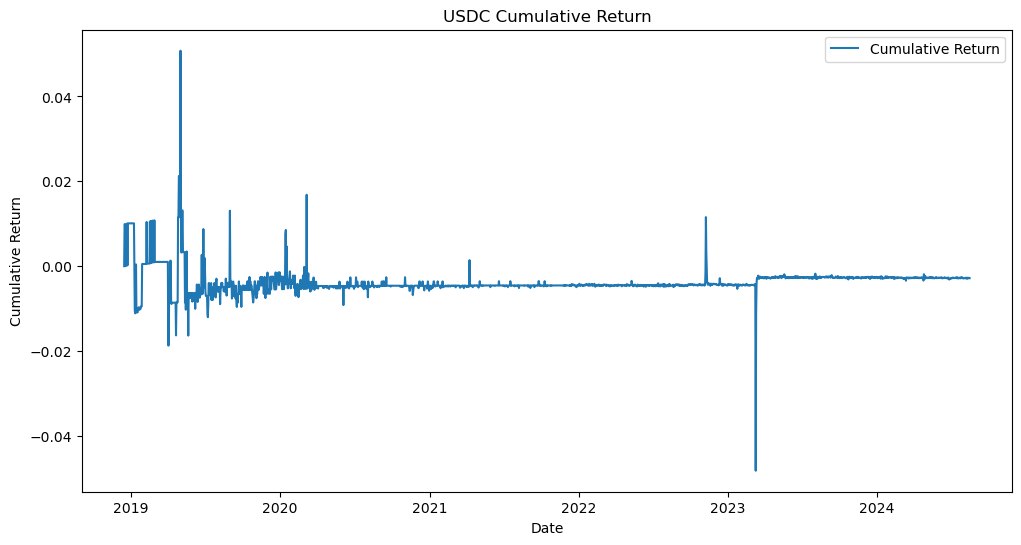

ticker
BNB     0.004053
BTC     0.004520
DOGE    0.004868
ETH     0.003724
USDC   -0.000001
Name: return, dtype: float64


In [8]:
# Calculate average daily return
average_return = df.groupby('ticker')['return'].mean()

# Calculate cumulative returns
df['cumulative_return'] = df.groupby('ticker')['return'].cumsum()

# Plot cumulative returns for each cryptocurrency
for ticker, group in df.groupby('ticker'):
    plt.figure(figsize=(12, 6))
    plt.plot(group['date'], group['cumulative_return'], label='Cumulative Return')
    plt.title(f'{ticker} Cumulative Return')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return')
    plt.legend()
    plt.show()

print(average_return)

Higher Returns: DOGE, BTC, and BNB offer higher average returns, suggesting they have had better performance in terms of daily gains. Among these, DOGE has shown the highest return.

Lower Returns: ETH has a slightly lower average return, which might suggest it has been slightly less profitable compared to DOGE, BTC, and BNB.

Stablecoins: USDC’s near-zero average return aligns with its purpose as a stablecoin, which is to minimize risk and maintain a stable value rather than providing high returns.

Although DOGE has the highest return among the 5 cryptocurrencies here, DOGE also has a highest volatility.

To determine which cryptocurrency to invest in, we will continue to calculate Sharpe ratio, which is a measure of return relative to the risk.

### Sharpe Ratio

In [9]:
# Calculate sharpe ratio
sharpe_ratio = average_return / volatility

print(sharpe_ratio)

ticker
BNB     0.069943
BTC     0.062652
DOGE    0.055157
ETH     0.064660
USDC   -0.000515
Name: return, dtype: float64


BNB has the highest Sharpe Ratio, indicating the best risk-adjusted return among the cryptocurrencies among these 5 cryptocurrencies.

BTC and DOGE follow, with BTC offering slightly better risk-adjusted returns compared to DOGE.

ETH has a lower Sharpe Ratio than BNB and BTC, suggesting a lower risk-adjusted return.

USDC has a negative Sharpe Ratio, reflecting poor performance relative to its risk (or in this case, lack of return).

### Correlation Analysis

In [10]:
# Pivot the DataFrame to have dates as rows and tickers as columns
pivot_df = df.pivot_table(index='date', columns='ticker', values='close')

# Calculate correlation matrix
correlation_matrix = pivot_df.pct_change().corr()

print(correlation_matrix)


ticker       BNB       BTC      DOGE       ETH      USDC
ticker                                                  
BNB     1.000000  0.590499  0.284246  0.570621 -0.022175
BTC     0.590499  1.000000  0.364842  0.556819 -0.080421
DOGE    0.284246  0.364842  1.000000  0.353188 -0.022177
ETH     0.570621  0.556819  0.353188  1.000000 -0.054356
USDC   -0.022175 -0.080421 -0.022177 -0.054356  1.000000


Positive Correlations: BNB, BTC, and ETH show moderate positive correlations with each other, indicating that their prices tend to move in similar directions to some extent.

Weak Correlations: DOGE shows weaker correlations with the other cryptocurrencies, meaning it moves somewhat independently of them.

Stablecoin (USDC): USDC has very low or negative correlations with all other cryptocurrencies, which is expected as it is designed to be a stable asset with minimal price fluctuations.